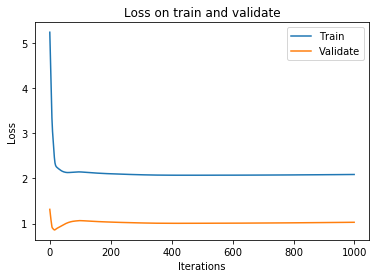

In [1]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    # read the dataset and get x and label y
    x, y = ds.load_svmlight_file("/Users/zoushuai/Downloads/australian_scale.txt")
    # use train_test_split function to split the dataset.randomly choose 20% as the validate dataset
    x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2,random_state=23)
    x_train = x_train.toarray()
    x_validate = x_validate.toarray()
    return x_train, x_validate, y_train, y_validate

def linear_func(x, seta, b):
    sum_setaX = np.dot(seta,x)
    return sum_setaX + b

def loss_func(x_train,y_train,seta,b,c):
    count = 0
    for x,y in zip(x_train,y_train):
        conp = 1 - y * linear_func(x,seta,b)
        if conp > 0:
            count += conp
        else:
            count += 0
    seta_squa = seta * seta
    loss = 0.5 * seta_squa.sum(axis=0) + c * count
    return loss
def bgd(x_set,y_set,seta,b,delta_seta,delta_b):
    for x, y in zip(x_set, y_set):
        if (1 - y * linear_func(x, seta, b)) >= 0:
            delta_seta = - c * x * y
            delta_b = -1 * c * y
        else:
            delta_seta = 0
            delta_b = 0
        seta = seta - alpha * delta_seta
        b = b - alpha * delta_b
    return seta,b

if __name__ == '__main__':
    x_train, x_validate, y_train, y_validate = load_data()
    seta = np.zeros(x_train.shape[1])
    alpha = 0.01
    b = 0.01
    maxIters = 1000
    #different c can result in big difference
    # c = 0.008  0.01 0.001(bad) 0.004(not so good)
    c = 0.01
    delta_seta = np.zeros(x_train.shape[1])
    delta_b = 0
    train_loss_sum = []
    validate_loss_sum = []
    iter_arr = []
    for i in range(maxIters):
        seta,b = bgd(x_train,y_train,seta,b,delta_seta,delta_b)
        train_loss = loss_func(x_train,y_train,seta,b,c)
        validate_loss = loss_func(x_validate,y_validate,seta,b,c)
        train_loss_sum.append(train_loss)
        validate_loss_sum.append(validate_loss)
        iter_arr.append(i)
    plt.plot(iter_arr,train_loss_sum,label="Train")
    plt.plot(iter_arr,validate_loss_sum,label="Validate")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Loss on train and validate")
    plt.legend(loc='upper right')
    plt.show()